In [1]:
import numpy as np
from numpy import random as np_rand
import matplotlib.pyplot as plt

import kernels as kernel

## Kernel classification
Kernel 1: Linear kernel

$K(x,y) = x^T y$

In [2]:
# Set number of training data
nPlus = 20
nMinus = 20
n = nPlus + nMinus

# Positive data centered at (1,1) with SD = 1
xPlus = np_rand.normal(1,1,(2,nPlus))
# Negative data centered at (-1,-1) with SD = 2
xMinus = np_rand.normal(-1,2,(2,nMinus))
# Concatenate datasets into one
x = np.hstack((xPlus,xMinus)) 

# Training data labels
y = np.hstack(([1]*nPlus,[-1]*nMinus))  

# Empty kernel matrices
kPlus = np.zeros((nPlus,nPlus))
kMinus = np.zeros((nMinus,nMinus))

# Calculate K matrix for all plus data
for ii in range(nPlus):
    for jj in range(nPlus):
        kPlus[ii,jj]= kernel.linear(xPlus[:,ii],xPlus[:,jj])

# Calculate K matrix for all minus data
for ii in range(nMinus):
    for jj in range(nMinus):        
        kMinus[ii,jj]= kernel.linear(xMinus[:,ii],xMinus[:,jj])

## Prediction
$y = sgn \left( \sum\limits_{i=1}^{n} \alpha_i k(x, x_i) +b \right)$

where

$\alpha_i = \begin{cases} 
               \frac{1}{n_{+}} & \text{if } y_i = +1 \\
               \frac{1}{n_{-}} & \text{if } y_i =-1 
             \end{cases}$
             
$b = \frac{1}{2} \left( \frac{1}{n_{-}^2} \sum \limits_{(i,j)|y_i=y_j=-1} k(x_i, x_j) - \frac{1}{n_{+}^2} \sum \limits_{(i,j)|y_i=y_j=+1} k(x_i, x_j)\right)$

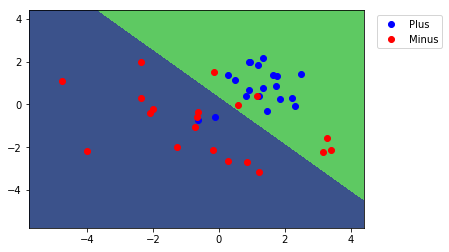

In [3]:
# Calculate offset for kernel classification
alpha = np.hstack(([1/nPlus]*nPlus,[-1/nMinus]*nMinus))
b = (np.sum(kMinus)/(nMinus**2)-np.sum(kPlus)/(nPlus**2))/2

# Create gradient map- test kernel classifier over grid
xMin = np.min(x)
xMax = np.max(x)
g = np.linspace(xMin-1,xMax+1,n)
y_hat = np.zeros((n,n))
k_x = np.zeros(n)

for ii in range(n):
    for jj in range(n):
        u=np.vstack((g[ii],g[jj]))
        for kk in range(n):
            k_x[kk]=kernel.linear(x[:,kk],u)
        y_hat[ii,jj]=np.dot(k_x,alpha)+b
        
# Plot kernel prediction map
plt.figure()
plt.contourf(g,g,y_hat,0)   
plt.plot(xPlus[0,:],xPlus[1,:],'bo',label='Plus')
plt.plot(xMinus[0,:],xMinus[1,:],'ro',label='Minus')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0));   

## Testing

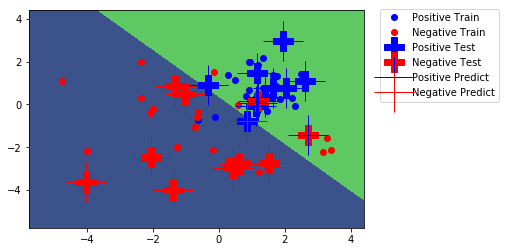

In [4]:
# Test data
nPlus_t = 10
nMinus_t = 10
n_t = nPlus_t + nMinus_t

# Generate test data and labels
xPlus_t = np_rand.normal(1,1,(2,nPlus_t))
xMinus_t = np_rand.normal(-1,2,(2,nMinus_t))
x_t = np.hstack((xPlus_t,xMinus_t))
y_t = np.hstack(([1]*nPlus_t,[-1]*nMinus_t))

k_test = np.zeros((n,n_t))

for ii in range(n):
    for jj in range(n_t):
        k_test[ii,jj] = alpha[ii]*kernel.linear(x[:,ii],x_t[:,jj])

# Predictions
y_est    = np.sum(k_test,axis=0)+b
prePlus  = np.argwhere(y_est>0)
preMinus = np.argwhere(y_est<0)

# Plot prediction
plt.figure()
plt.contourf(g,g,y_hat,0)   
plt.plot(xPlus[0,:],xPlus[1,:],'bo',label='Positive Train')
plt.plot(xMinus[0,:],xMinus[1,:],'ro',label='Negative Train')

plt.plot(xPlus_t[0,:],xPlus_t[1,:],'bP',markersize=20,label='Positive Test')
plt.plot(xMinus_t[0,:],xMinus_t[1,:],'rP',markersize=20,label='Negative Test')
plt.plot(x_t[0,prePlus],x_t[1,prePlus],'+b',markersize=40,label='Positive Predict')
plt.plot(x_t[0,preMinus],x_t[1,preMinus],'+r',markersize=40,label='Negative Predict')
plt.legend(loc='upper right', bbox_to_anchor=(1.42, 1.03));

## Try out other kernels
Kernel 2: Polynomial

$K(x,y) = (x^T y + r)^n$

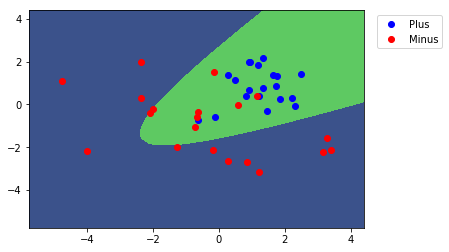

In [5]:
# Empty kernel matrices
kPlus = np.zeros((nPlus,nPlus))
kMinus = np.zeros((nMinus,nMinus))

def k(x,y):
    r = 1
    n = 2
    return kernel.polynomial(x,y,r,n)

# Calculate K matrix for all plus data
for ii in range(nPlus):
    for jj in range(nPlus):
        kPlus[ii,jj]= k(xPlus[:,ii],xPlus[:,jj])

# Calculate K matrix for all minus data
for ii in range(nMinus):
    for jj in range(nMinus):        
        kMinus[ii,jj]= k(xMinus[:,ii],xMinus[:,jj])
        
# Calculate offset for kernel classification
b = (np.sum(kMinus)/(nMinus**2)-np.sum(kPlus)/(nPlus**2))/2

# Create gradient map- test kernel classifier over grid
y_hat = np.zeros((n,n))
k_x = np.zeros(n)

for ii in range(n):
    for jj in range(n):
        u=np.vstack((g[ii],g[jj]))
        for kk in range(n):
            k_x[kk]=k(x[:,kk],u)
        y_hat[ii,jj]=np.dot(k_x,alpha)+b
        
# Plot kernel prediction map
plt.figure()
plt.contourf(g,g,y_hat,0)   
plt.plot(xPlus[0,:],xPlus[1,:],'bo',label='Plus')
plt.plot(xMinus[0,:],xMinus[1,:],'ro',label='Minus')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0));   

Kernel 3: Radial Basis Function

$K(x,y) = e^{-\frac{||x-y||^2}{2 \sigma^2}}$

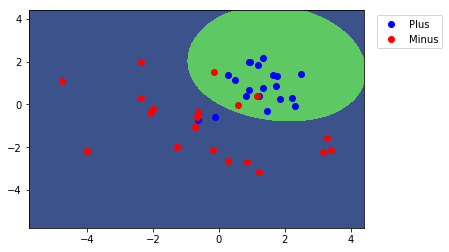

In [6]:
# Empty kernel matrices
kPlus = np.zeros((nPlus,nPlus))
kMinus = np.zeros((nMinus,nMinus))

def k(x,y):
    sig = 2
    return kernel.rbf(x,y,sig)

# Calculate K matrix for all plus data
for ii in range(nPlus):
    for jj in range(nPlus):
        kPlus[ii,jj]= k(xPlus[:,ii],xPlus[:,jj])

# Calculate K matrix for all minus data
for ii in range(nMinus):
    for jj in range(nMinus):        
        kMinus[ii,jj]= k(xMinus[:,ii],xMinus[:,jj])
        
# Calculate offset for kernel classification
b = (np.sum(kMinus)/(nMinus**2)-np.sum(kPlus)/(nPlus**2))/2

# Create gradient map- test kernel classifier over grid
y_hat = np.zeros((n,n))
k_x = np.zeros(n)

for ii in range(n):
    for jj in range(n):
        u = np.vstack((g[ii],g[jj])).squeeze()
        for kk in range(n):
            k_x[kk]=k(x[:,kk],u)
        y_hat[ii,jj]=np.dot(k_x,alpha)+b
        
# Plot kernel prediction map
plt.figure()
plt.contourf(g,g,y_hat,0)   
plt.plot(xPlus[0,:],xPlus[1,:],'bo',label='Plus')
plt.plot(xMinus[0,:],xMinus[1,:],'ro',label='Minus')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0));   

Kernel 4: Hyperbolic Tangent (Sigmoid)

$K(x,y) = \tanh(\kappa x^T y + \theta)$

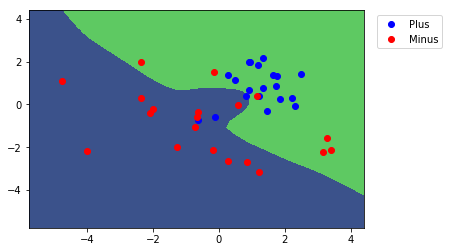

In [7]:
# Empty kernel matrices
kPlus = np.zeros((nPlus,nPlus))
kMinus = np.zeros((nMinus,nMinus))

def k(x,y):
    kap = 1
    tht = 3
    return kernel.tanh(x,y,kap,tht)

# Calculate K matrix for all plus data
for ii in range(nPlus):
    for jj in range(nPlus):
        kPlus[ii,jj]= k(xPlus[:,ii],xPlus[:,jj])

# Calculate K matrix for all minus data
for ii in range(nMinus):
    for jj in range(nMinus):        
        kMinus[ii,jj]= k(xMinus[:,ii],xMinus[:,jj])
        
# Calculate offset for kernel classification
b = (np.sum(kMinus)/(nMinus**2)-np.sum(kPlus)/(nPlus**2))/2

# Create gradient map- test kernel classifier over grid
y_hat = np.zeros((n,n))
k_x = np.zeros(n)

for ii in range(n):
    for jj in range(n):
        u = np.vstack((g[ii],g[jj])).squeeze()
        for kk in range(n):
            k_x[kk]=k(x[:,kk],u)
        y_hat[ii,jj]=np.dot(k_x,alpha)+b
        
# Plot kernel prediction map
plt.figure()
plt.contourf(g,g,y_hat,0)   
plt.plot(xPlus[0,:],xPlus[1,:],'bo',label='Plus')
plt.plot(xMinus[0,:],xMinus[1,:],'ro',label='Minus')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0));   

# Now try on the iris dataset

In [8]:
# Same as above, but with real data
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

iris = load_iris()
data = iris.data[:, :4]  # Only take the first two features.
labels = iris.target

seto_ind = np.argwhere(labels==0) # setosa
vers_ind = np.argwhere(labels==1) # versicolor
virg_ind = np.argwhere(labels==2) # virginica

seto = data[seto_ind,:]
vers = data[vers_ind,:]
virg = data[virg_ind,:]

n_tr = 40 # Number of training points

seto_train = seto[:n_tr,:]
vers_train = vers[:n_tr,:]
virg_train = virg[:n_tr,:]

seto_test = seto[n_tr:,:]
vers_test = vers[n_tr:,:]
virg_test = virg[n_tr:,:]

## Two-class classifier
Ex. 1: Setosa vs. Versicolor - Linear Kernel

Accuracy:  1.0


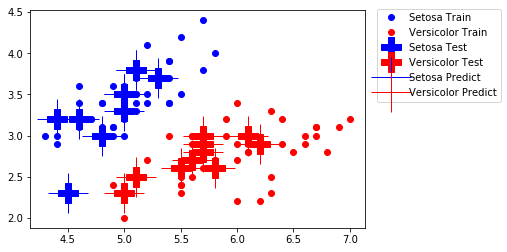

In [9]:
x = np.vstack((seto_train,vers_train))
seto_vers_label = np.hstack(([1]*n_tr,[-1]*n_tr))

k_seto = np.zeros((n_tr,n_tr))
k_vers = np.zeros((n_tr,n_tr))

for ii in range(n_tr):
    for jj in range(n_tr):
        k_seto[ii,jj]= kernel.linear(seto_train[ii,:,:],np.transpose(seto_train[jj,:,:]))
        
for ii in range(n_tr):
    for jj in range(n_tr):        
        k_vers[ii,jj]= kernel.linear(vers_train[ii,:,:],np.transpose(vers_train[jj,:,:]))

b = (np.sum(k_vers)/(n_tr**2)-np.sum(k_seto)/(n_tr**2))/2
alpha=np.hstack(((1/n_tr)*np.ones(n_tr),(-1/n_tr)*np.ones(n_tr)))

# compute test data prediction
n_seto_test = 50-n_tr
n_vers_test = 50-n_tr

n_t = n_seto_test + n_vers_test
x_t = np.vstack((seto_test,vers_test))
y_t = np.hstack(([1]*n_seto_test,[-1]*n_vers_test))

k_test = np.zeros((2*n_tr,n_t))

for ii in range(2*n_tr):
    for jj in range(n_t):
        k_test[ii,jj] = alpha[ii]*kernel.linear(x[ii,:,:],np.transpose(x_t[jj,:,:]))
        
y_est = np.sum(k_test,axis=0)+b
prePlus = np.argwhere(y_est>0)
preMinus = np.argwhere(y_est<0)
y_est[y_est>=0]=1
y_est[y_est<0]=-1
rate = accuracy_score(y_t,y_est)
print("Accuracy: ",rate)

# plot prediction
plt.plot(seto_train[:,:,0],seto_train[:,:,1],'bo')
plt.plot(vers_train[:,:,0],vers_train[:,:,1],'ro')
plt.plot(seto_test[:,:,0],seto_test[:,:,1],'bP',markersize=20)
plt.plot(vers_test[:,:,0],vers_test[:,:,1],'rP',markersize=20)
plt.plot(x_t[prePlus,0,0],x_t[prePlus,0,1],'+b',markersize=40)
plt.plot(x_t[preMinus,0,0],x_t[preMinus,0,1],'+r',markersize=40)
plt.legend(('Setosa Train','Versicolor Train',
            'Setosa Test','Versicolor Test',
            'Setosa Predict','Versicolor Predict'),
          loc='upper right', bbox_to_anchor=(1.42, 1.03));

## Two-class classifier
Ex. 2: Versicolor vs. Virginica - Polynomial Kernel

Accuracy:  0.85


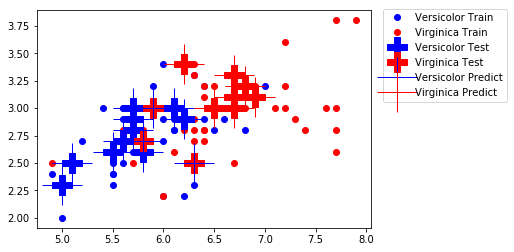

In [10]:
x = np.vstack((vers_train,virg_train))
vers_virg_label = np.hstack(([1]*n_tr,[-1]*n_tr))

k_virg = np.zeros((n_tr,n_tr))
k_vers = np.zeros((n_tr,n_tr))

def k(x,y):
    r = 1
    n = 2
    return kernel.polynomial(x,y,r,n)

for ii in range(n_tr):
    for jj in range(n_tr):
        k_vers[ii,jj]= k(vers_train[ii,:,:],np.transpose(vers_train[jj,:,:]))
        
for ii in range(n_tr):
    for jj in range(n_tr):        
        k_virg[ii,jj]= k(virg_train[ii,:,:],np.transpose(virg_train[jj,:,:]))

b = (np.sum(k_virg)/(n_tr**2)-np.sum(k_vers)/(n_tr**2))/2
alpha=np.array(np.hstack(([1/n_tr]*n_tr,[-1/n_tr]*n_tr)))

# compute test data prediction
n_virg_test = 50-n_tr
n_vers_test = 50-n_tr

n_t = n_seto_test + n_vers_test
x_t = np.vstack((vers_test,virg_test))
y_t = np.hstack(([1]*n_vers_test,[-1]*n_virg_test))

k_test = np.zeros((2*n_tr,n_t))

for ii in range(2*n_tr):
    for jj in range(n_t):
        k_test[ii,jj] = alpha[ii]*k(x[ii,:,:],np.transpose(x_t[jj,:,:]))
        
y_est = np.sum(k_test,axis=0)+b
prePlus = np.argwhere(y_est>0)
preMinus = np.argwhere(y_est<0)

y_est[y_est>=0]=1
y_est[y_est<0]=-1
rate = accuracy_score(y_t,y_est)
print("Accuracy: ",rate)

# plot prediction
plt.plot(vers_train[:,:,0],vers_train[:,:,1],'bo')
plt.plot(virg_train[:,:,0],virg_train[:,:,1],'ro')
plt.plot(vers_test[:,:,0],vers_test[:,:,1],'bP',markersize=20)
plt.plot(virg_test[:,:,0],virg_test[:,:,1],'rP',markersize=20)
plt.plot(x_t[prePlus,0,0],x_t[prePlus,0,1],'+b',markersize=40)
plt.plot(x_t[preMinus,0,0],x_t[preMinus,0,1],'+r',markersize=40)
plt.legend(('Versicolor Train','Virginica Train',
            'Versicolor Test','Virginica Test',
            'Versicolor Predict','Virginica Predict'),
          loc='upper right', bbox_to_anchor=(1.42, 1.03));